# <font color='#2B17B0'>CIENCIA DE DATOS APLICADA A FINANZAS</font>
Sesión 8, 2022-06-05<br>
Carlos Crespo Elizondo<br>
EGADE BUSINESS SCHOOL

In [1]:
from herramientas import herramientas_financieras as hf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
%load_ext autoreload
%autoreload 2

# <font color='red'>DETALLE EN LA SESION 7</font>


`cemex.set_index(cemex['Date'], inplace=True)`<br>
En la sesión 7, asigné el index como en el renglón superior. Y teniamos dos veces la columna 'Date' en el DataFrame.<br><br>
El asignar la serie,  hace que el index sean los valores de la columna 'Date', en lugar de usar la columna 'Date' como index.

In [4]:
cemex = hf.precios('cemexcpo.mx')

In [6]:
cemex

,fecha,apertura,maximo,minimo,cierre,cierre_ajustado,volumen
0,2023-01-02,7.95,7.98,7.85,7.98,7.98,1833811.0
1,2023-01-03,8.01,8.15,7.93,8.03,8.03,8179125.0
2,2023-01-04,8.04,8.60,8.04,8.48,8.48,22724605.0
3,2023-01-05,8.41,8.65,8.40,8.55,8.55,20844316.0
4,2023-01-06,8.55,8.87,8.52,8.80,8.80,17865796.0
...,...,...,...,...,...,...,...
101,2023-05-30,10.94,11.03,10.50,10.57,10.57,55548076.0
102,2023-05-31,10.59,10.81,10.50,10.62,10.62,142812494.0
103,2023-06-01,10.64,10.87,10.57,10.64,10.64,31357972.0
104,2023-06-02,10.64,11.18,10.64,11.13,11.13,41878887.0


In [7]:
cemex.set_index(cemex['fecha'])

,fecha,apertura,maximo,minimo,cierre,cierre_ajustado,volumen
fecha,,,,,,,
2023-01-02,2023-01-02,7.95,7.98,7.85,7.98,7.98,1833811.0
2023-01-03,2023-01-03,8.01,8.15,7.93,8.03,8.03,8179125.0
2023-01-04,2023-01-04,8.04,8.60,8.04,8.48,8.48,22724605.0
2023-01-05,2023-01-05,8.41,8.65,8.40,8.55,8.55,20844316.0
2023-01-06,2023-01-06,8.55,8.87,8.52,8.80,8.80,17865796.0
...,...,...,...,...,...,...,...
2023-05-30,2023-05-30,10.94,11.03,10.50,10.57,10.57,55548076.0
2023-05-31,2023-05-31,10.59,10.81,10.50,10.62,10.62,142812494.0
2023-06-01,2023-06-01,10.64,10.87,10.57,10.64,10.64,31357972.0


In [8]:
cemex.set_index('fecha')

,apertura,maximo,minimo,cierre,cierre_ajustado,volumen
fecha,,,,,,
2023-01-02,7.95,7.98,7.85,7.98,7.98,1833811.0
2023-01-03,8.01,8.15,7.93,8.03,8.03,8179125.0
2023-01-04,8.04,8.60,8.04,8.48,8.48,22724605.0
2023-01-05,8.41,8.65,8.40,8.55,8.55,20844316.0
2023-01-06,8.55,8.87,8.52,8.80,8.80,17865796.0
...,...,...,...,...,...,...
2023-05-30,10.94,11.03,10.50,10.57,10.57,55548076.0
2023-05-31,10.59,10.81,10.50,10.62,10.62,142812494.0
2023-06-01,10.64,10.87,10.57,10.64,10.64,31357972.0


# <font color='#2B17B0'>Análisis técnico y análisis fundamental</font>


## Diferencia entre los dos tipos de análisis

## Análisis técnico

## Algoritmo Promedios Móviles

Un promedio móvil es una técnica que calcula el promedio de un conjunto de datos a lo largo de un período específico, que se actualiza constantemente a medida que pasa el tiempo. Por ejemplo, en el caso de los precios de cierre de una acción, un promedio móvil de 20 días calcula el promedio de los precios de cierre de los últimos 20 días. Con cada día que pasa, se elimina el dato correspondiente al día más antiguo de los 20 y se incorpora el precio del día más reciente. De esta forma, el promedio móvil siempre refleja el precio promedio de las últimos 20 días.<br><br>

Los PM se basan en la idea que los precios:
* Reflejan unicamente el *sentir* del mercado en ese dia.
* No reflejan el verdadero precio del activo.
* Todos los días se corrigen los precios para llegar al precio real.
* Al promediar los precios de cierre de los últimos "n" dias, se llega a un precio más real. 
<br><br>
Comentarios:
* Uno de los indicadores técnicos más utilizados.
* Muchos sistemas basados en estrategias de "trend-following", lo utilizan como base de sus algorítmos.
* Muy fácil de cuantificar y probar. 
* Las reglas de los promedios móviles son fácil de programar y generar señales de compra venta.
<br><br>
El PM se calcula de la siguiente manera:
* Generamos dos promedios móviles vectorizados, donde generalmente el 1er promedio móvil (PM1) es de corto plazo (3 a 30 dias) y el 2do promédio móvil (PM2) es de mediano plazo (2, 3 hasta 12 meses).
<br><br>

Nuestra estrategia consiste en tomar posiciones "long" (comprar) o "short" (vender) al cruce de los PMs:
* Long: PM1 > PM2
* Short: PM1 < PM2 
<br><br>
Para calcular los PMs, utilizaremos el "método" .rolling(window).mean( ).
con los siguientes datos:

In [11]:
accion = 'cemexcpo.mx'
pm1 = 13
pm2 = 55

df = hf.precios(accion, '2020-01-01', '2023-05-29')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 857 entries, 2020-01-02 to 2023-05-26
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   apertura         856 non-null    float64
 1   maximo           856 non-null    float64
 2   minimo           856 non-null    float64
 3   cierre           856 non-null    float64
 4   cierre_ajustado  856 non-null    float64
 5   volumen          856 non-null    float64
dtypes: float64(6)
memory usage: 46.9 KB


### <font color='red'>Mejorar lo aportado en la sesión 7 sobre datos faltantes del 10 de marzo, 2023</font>


In [13]:
df.loc['2023-03-10']

apertura          NaN
maximo            NaN
minimo            NaN
cierre            NaN
cierre_ajustado   NaN
volumen           NaN
Name: 2023-03-10 00:00:00, dtype: float64

#### <font color='red'>Interpolar el día previo y posrterior al 10 de marzo</font>


In [16]:
anterior = df.loc[:'2023-03-10'].iloc[-2]

In [17]:
posterior = df.loc['2023-03-10':].iloc[1]

In [18]:
df.loc['2023-03-10'] = (anterior + posterior)/2

In [19]:
df.loc['2023-03-10']

apertura           9.450000e+00
maximo             9.705000e+00
minimo             9.330000e+00
cierre             9.520000e+00
cierre_ajustado    9.520000e+00
volumen            3.866552e+07
Name: 2023-03-10 00:00:00, dtype: float64

#### <font color='red'>ACTUALIZAR LA FUNCION precios </font>


### Cálculo de los promedios móviles

Referencia sobre la función `rolling` de pandas:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [20]:
df['pm1'] = df['cierre_ajustado'].rolling(pm1).mean()
df['pm2'] = df['cierre_ajustado'].rolling(pm2).mean()
df.dropna(inplace=True)

### Visualización

In [21]:
df.drop(['apertura', 'maximo', 'minimo', 'cierre', 'volumen'], axis=1, inplace=True)

In [22]:
df.head()

,cierre_ajustado,pm1,pm2
fecha,,,
2020-03-20,4.32,5.497692,6.905455
2020-03-23,4.24,5.316923,6.852364
2020-03-24,4.47,5.143077,6.802909
2020-03-25,4.29,4.991538,6.750000
2020-03-26,4.61,4.893846,6.705273


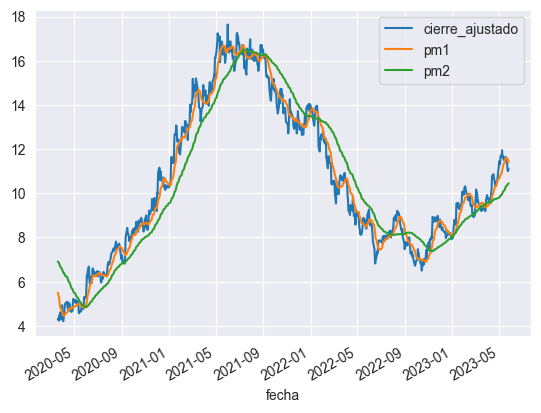

In [23]:
df.plot();

### <font color='red'>Hacer gráfica de verdad</font>


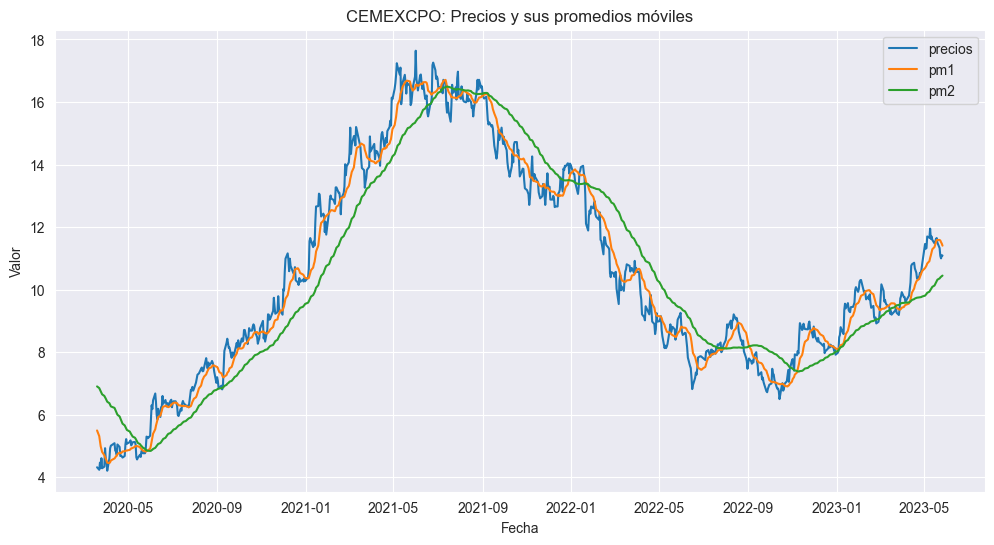

In [24]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df.index, df['cierre_ajustado'], label='precios')
ax.plot(df.index, df['pm1'], label='pm1')
ax.plot(df.index, df['pm2'], label='pm2')

ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.set_title(f'{accion.upper().replace(".MX", "")}: Precios y sus promedios móviles')
ax.legend();


### Calcular posicion en el mercado

Ventas en corto permitidas:
La estrategia consiste en tomar posiciones "long" o "short" al cruce de los PMs:
* Long: PM1 > PM2 $\longrightarrow$ __1__
* Short: PM1 < PM2 $\longrightarrow$ __-1__

Ventas en corto no permitidas:
* Long: PM1 > PM2 $\longrightarrow$ __1__
* Out:   PM1 < PM2 $\longrightarrow$ **0**

El utilizar números nos permite:
* Visualizar posición en el mercado de acuerdo a los crueces de lospromedios móviles
* Calcular los retornos de de la estrategia

#### Cálculo de posición del mercado utilizando ventas en corto

Referencia sobre función `where` de numpy:
https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [25]:
long = 1
short = -1

df['posicion'] = np.where(df['pm1']>df['pm2'], long, short)

#### Visualizar posiciones en el mercado

In [26]:
df

,cierre_ajustado,pm1,pm2,posicion
fecha,,,,
2020-03-20,4.32,5.497692,6.905455,-1
2020-03-23,4.24,5.316923,6.852364,-1
2020-03-24,4.47,5.143077,6.802909,-1
2020-03-25,4.29,4.991538,6.750000,-1
2020-03-26,4.61,4.893846,6.705273,-1
...,...,...,...,...
2023-05-22,11.33,11.589231,10.359091,1
2023-05-23,11.08,11.570000,10.389818,1
2023-05-24,11.00,11.516154,10.411818,1


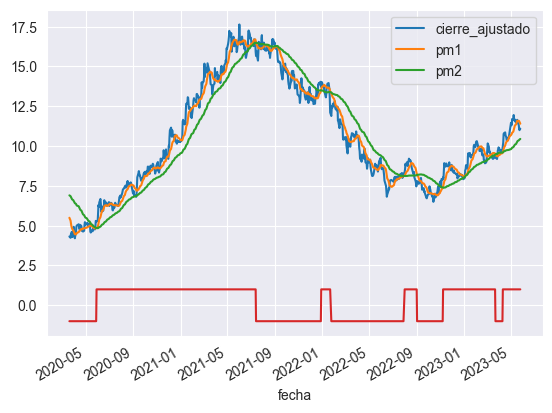

In [27]:
df[['cierre_ajustado', 'pm1', 'pm2']].plot()
df['posicion'].plot();

### <font color='red'>Hacer gráfica de verdad</font>


In [28]:
df['ret_ln'] = hf.ret_ln(df['cierre_ajustado'])

In [29]:
df.dropna(inplace=True)

In [30]:
df['ret_est'] = df['ret_ln'] * df['posicion'].shift(1)

In [31]:
df[['ret_ln', 'ret_est']].sum()

ret_ln     0.942788
ret_est    1.313588
dtype: float64

### <font color='red'>CONTINUAR CON LA CLASE</font>


### Retornos del mercado Vs Estrategia PMs

In [32]:
np.exp(df[['ret_ln', 'ret_est']].sum())

ret_ln     2.567130
ret_est    3.719495
dtype: float64

### Visualizar desempeño

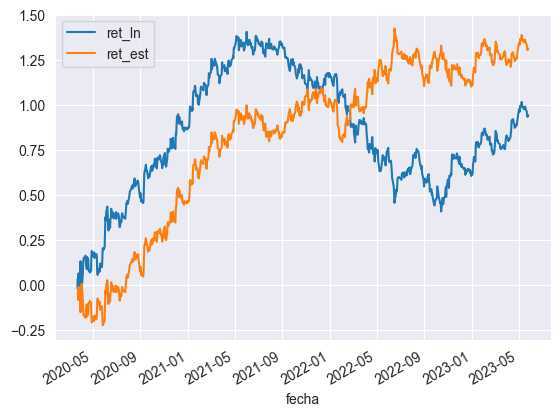

In [35]:
df[['ret_ln', 'ret_est']].cumsum().plot();

In [40]:
df_pct = pd.DataFrame(np.arange(.01, 1.01, .01), columns=['pct_caida'])
df_pct['nuevo_valor'] = 1 * (1-df_pct['pct_caida'])
df_pct['pct_recuperacion'] = (1/df_pct['nuevo_valor']) - 1
             

In [43]:
df_pct.tail()

,pct_caida,nuevo_valor,pct_recuperacion
95,0.96,0.04,24.000000
96,0.97,0.03,32.333333
97,0.98,0.02,49.000000
98,0.99,0.01,99.000000
99,1.00,0.00,inf


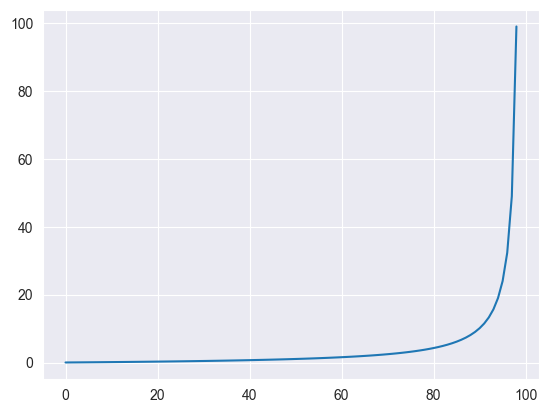

In [42]:
df_pct['pct_recuperacion'].plot();

### Balance monetario

In [44]:
balance = 100 * (1 + df['ret_est']).cumprod()

In [45]:
balance

fecha
2020-03-23           NaN
2020-03-24     94.717486
2020-03-25     98.610533
2020-03-26     91.516381
2020-03-27     98.100172
                 ...    
2023-05-22    281.749259
2023-05-23    275.462758
2023-05-24    273.466643
2023-05-25    275.941471
2023-05-26    275.692763
Name: ret_est, Length: 802, dtype: float64

In [46]:
balance.index

DatetimeIndex(['2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03',
               ...
               '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18',
               '2023-05-19', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26'],
              dtype='datetime64[ns]', name='fecha', length=802, freq=None)

### Balance: Máximos

In [47]:
picos = balance.cummax()
picos

fecha
2020-03-23           NaN
2020-03-24     94.717486
2020-03-25     98.610533
2020-03-26     98.610533
2020-03-27     98.610533
                 ...    
2023-05-22    327.768326
2023-05-23    327.768326
2023-05-24    327.768326
2023-05-25    327.768326
2023-05-26    327.768326
Name: ret_est, Length: 802, dtype: float64

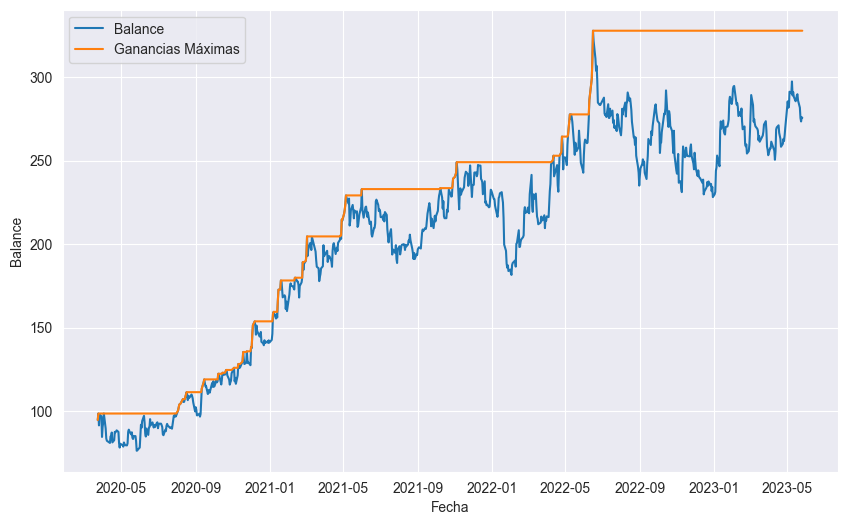

In [50]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(balance.index, balance, label='Balance')
ax.plot(picos.index, picos, label='Ganancias Máximas')
ax.legend()

ax.set_xlabel('Fecha')
ax.set_ylabel('Balance');

### Balance: Perdidas

### Encontrar pérdida máxima

Pasos:
1. Identificar la mayor pérdida del periodo
1. Encontrar la fecha de la mayor pérdida
1. Identificar el pico máximo acumulado en la fecha de la mayor perdida
1. Identificar el balance en la fecha de la mayor pérdida
1. Graficar

#### dentificar la mayor perdida

#### Encontrar fecha

#### Identificar valor del pico máximo en la fecha de la mayor perdida

#### Identificar balance en la fecha de la mayor pérdida

## Estrategia de Reversión a la Media

La idea de las estrategias de reversión a la media se basan en el concepto de que el precio volverá a su precio medio. Una forma común de implementar esta estrategia es con las Bandas de Bollinger.

### Bandas de Bollinger

Las Bandas de Bollinger son un indicador de volatilidad desarrollado por John Bollinger.  La estrategia consiste en crear un rango alrededor del precio medio. Cuando el precio de la acción cruza por encima de la banda superior, se genera una señal de venta ya que se considera que el precio está "sobrevaluado" y es probable que sufra una corrección. Cuando el precio cruza por debajo de la banda inferior, se genera una señal de compra ya que se considera que el precio está "subvaluado" y es probable que se produzca un rebote.

Se calculan a partir de una media móvil (generalmente de 20 períodos) a la que se añaden dos bandas situadas a dos desviaciones estándar de la media. De esta forma, las bandas se ensanchan o se estrechan en función de la volatilidad del mercado.

La fórmula para calcular las Bandas de Bollinger es la siguiente:

$$Banda\_promedio=\frac{1}{n}\sum_{i=0}^{n-1}Precio_{t-i}$$

$$Banda\_superior = Banda\_media + k \cdot \sigma_{n}$$

$$Banda\_inferior = Banda\_media - k \cdot \sigma_{n}$$

Donde:
* $n$ es el número de periodos 
* $k$ es el número de desviaciones estándar que queremos que la banda se aleje de la media móvil.  Por lo general $k=2$
* $\sigma_n$ es la desviación estándar de los precios en los últimos $n$ días

## Estrategia de Momentum

Las estrategias de Momentum, buscan aprovechar las tendencias del mercado.  Existen varias estrategias como Momentum (corto, largo plazo), Momentum inverso, Indice de Fuerza Relativa, etc.  En lo general todas estas estrategias implican medir el rendimiento pasado de los activos en relación con un período de tiempo determinado.

### Estrategia de Momentum

Consiste en comprar activos financieros (en nuestro caso acciones) que han mostrado un rendimiento superior y vender aquellos que han tenido un rendimiento inferior, bajo la suposición de que las acciones que han subido en precio continuarán subiendo, y aquellas que han bajado continuarán bajando. Esta estrategia se basa en la psicología del mercado y en la tendencia de los inversionistas a subestimar la magnitud y persistencia de las tendencias del precio de los activos financieros. 

### Indice de Fuerza Relativa - RSI (Relative Streght Index)

Es un oscilador de momento que mide la velocidad y el cambio de los movimientos de precio de un valor. El RSI oscila entre 0 y 100 y se utiliza principalmente para identificar condiciones de sobrecompra o sobreventa en un mercado.  El RSI se interpreta generalmente de la siguiente manera:
* RSI > 70:  La acción puede estar sobrecomprada, puede ser un buen momento para vender
* RSI < 30:  La acción puede estar sobrevendida, puede ser un buen momento para comprar
* 30 < RSI < 70:  La acción está en una zona de neutralidad y el mercado está equilibrado

#### Pasos para calcular el RSI

1. Seleccionar un número de períodos de tiempo a incluir en el cálculo del RSI. El valor más comúnmente utilizado es 14.
1. Calcular el cambio de precio de un período de tiempo a otro.
1. Calcular el promedio de ganancias y pérdidas durante el periodo seleccionado (RS).<br><br>
$$RS=\frac{PromedioGananciasEnNPeriodos}{PromediosPerdidasEnNPeriodos}$$<br><br>
1. Calcular el índice de fuerza relativa usando la fórmula:<br>
$$RSI = 100 - \frac{100}{1 + RS}$$<br>

# <font color='#2B17B0'>Utilizar dos estrategias</font>